In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
from scipy import stats

In [5]:
dataset_path = 'auto-insurance-fall-2017/train_auto.csv'
df = pd.read_csv(dataset_path)
df = df.drop('INDEX', axis = 1)

def clean_currency(s):
    s = ''.join([x for x in s if x not in ['$',',']])
    s = float(s)
    return s

In [6]:


def analyze_series(series):
    name = series.name
    sample = series.iloc[0]
    nan_prop = series.isna().sum() / len(series)

    min, max, mean, std = None, None, None, None
    datatype = None
    unique = None

    if isinstance(sample, str) and sample[0] == '$':
        series = series.apply(lambda x : clean_currency(x) if pd.notnull(x) else x)

    sample = series.iloc[0]
    dtype = str(type(sample))
    
    if not isinstance(sample, str):
        min = np.min(series)
        max = np.max(series)
        mean = np.mean(series)
        std = np.std(series)
        datatype = 'numeric'
    else: 
        unique = series.unique()
        datatype = 'categorical'
    
    print(f'Column name: {name}')
    print(f'\tDatatype: {datatype} ({dtype})')
    print(f'\tNaN Proportion: {nan_prop}')
    if not isinstance(sample, str):
        print(f'\tmin:{min}, max:{max}, mean:{mean}, std:{std}')
    else: 
        print(f'\tUnique: {len(unique)}')

    return datatype
    
def analyze_df(df):
    numerics = []
    for s in df: 
        dt = analyze_series(df[s])
        if dt == 'numeric':
            numerics.append(s)
    return numerics


    



In [7]:
n = analyze_df(df)


Column name: TARGET_FLAG
	Datatype: numeric (<class 'numpy.int64'>)
	NaN Proportion: 0.0
	min:0, max:1, mean:0.2638157088592084, std:0.2638157088592084
Column name: TARGET_AMT
	Datatype: numeric (<class 'numpy.float64'>)
	NaN Proportion: 0.0
	min:0.0, max:107586.13616, mean:1504.324648122829, std:1504.324648122829
Column name: KIDSDRIV
	Datatype: numeric (<class 'numpy.int64'>)
	NaN Proportion: 0.0
	min:0, max:4, mean:0.17105746844749417, std:0.17105746844749417
Column name: AGE
	Datatype: numeric (<class 'numpy.float64'>)
	NaN Proportion: 0.0007352040191153045
	min:16.0, max:81.0, mean:44.79031269160024, std:44.79031269160024
Column name: HOMEKIDS
	Datatype: numeric (<class 'numpy.int64'>)
	NaN Proportion: 0.0
	min:0, max:5, mean:0.7212351427521138, std:0.7212351427521138
Column name: YOJ
	Datatype: numeric (<class 'numpy.float64'>)
	NaN Proportion: 0.05563043744639137
	min:0.0, max:23.0, mean:10.499286363046581, std:10.499286363046581
Column name: INCOME
	Datatype: numeric (<class 'n

In [8]:
def clean_data(df):
    for col in df:
        series = df[col]
        sample = series.iloc[0]

        if isinstance(sample, str) and sample[0] == '$':
            series = series.apply(lambda x : clean_currency(x) if pd.notnull(x) else x)
            df[col] = series

    df = df.dropna(axis=0)
    return df

In [9]:
df = clean_data(df)

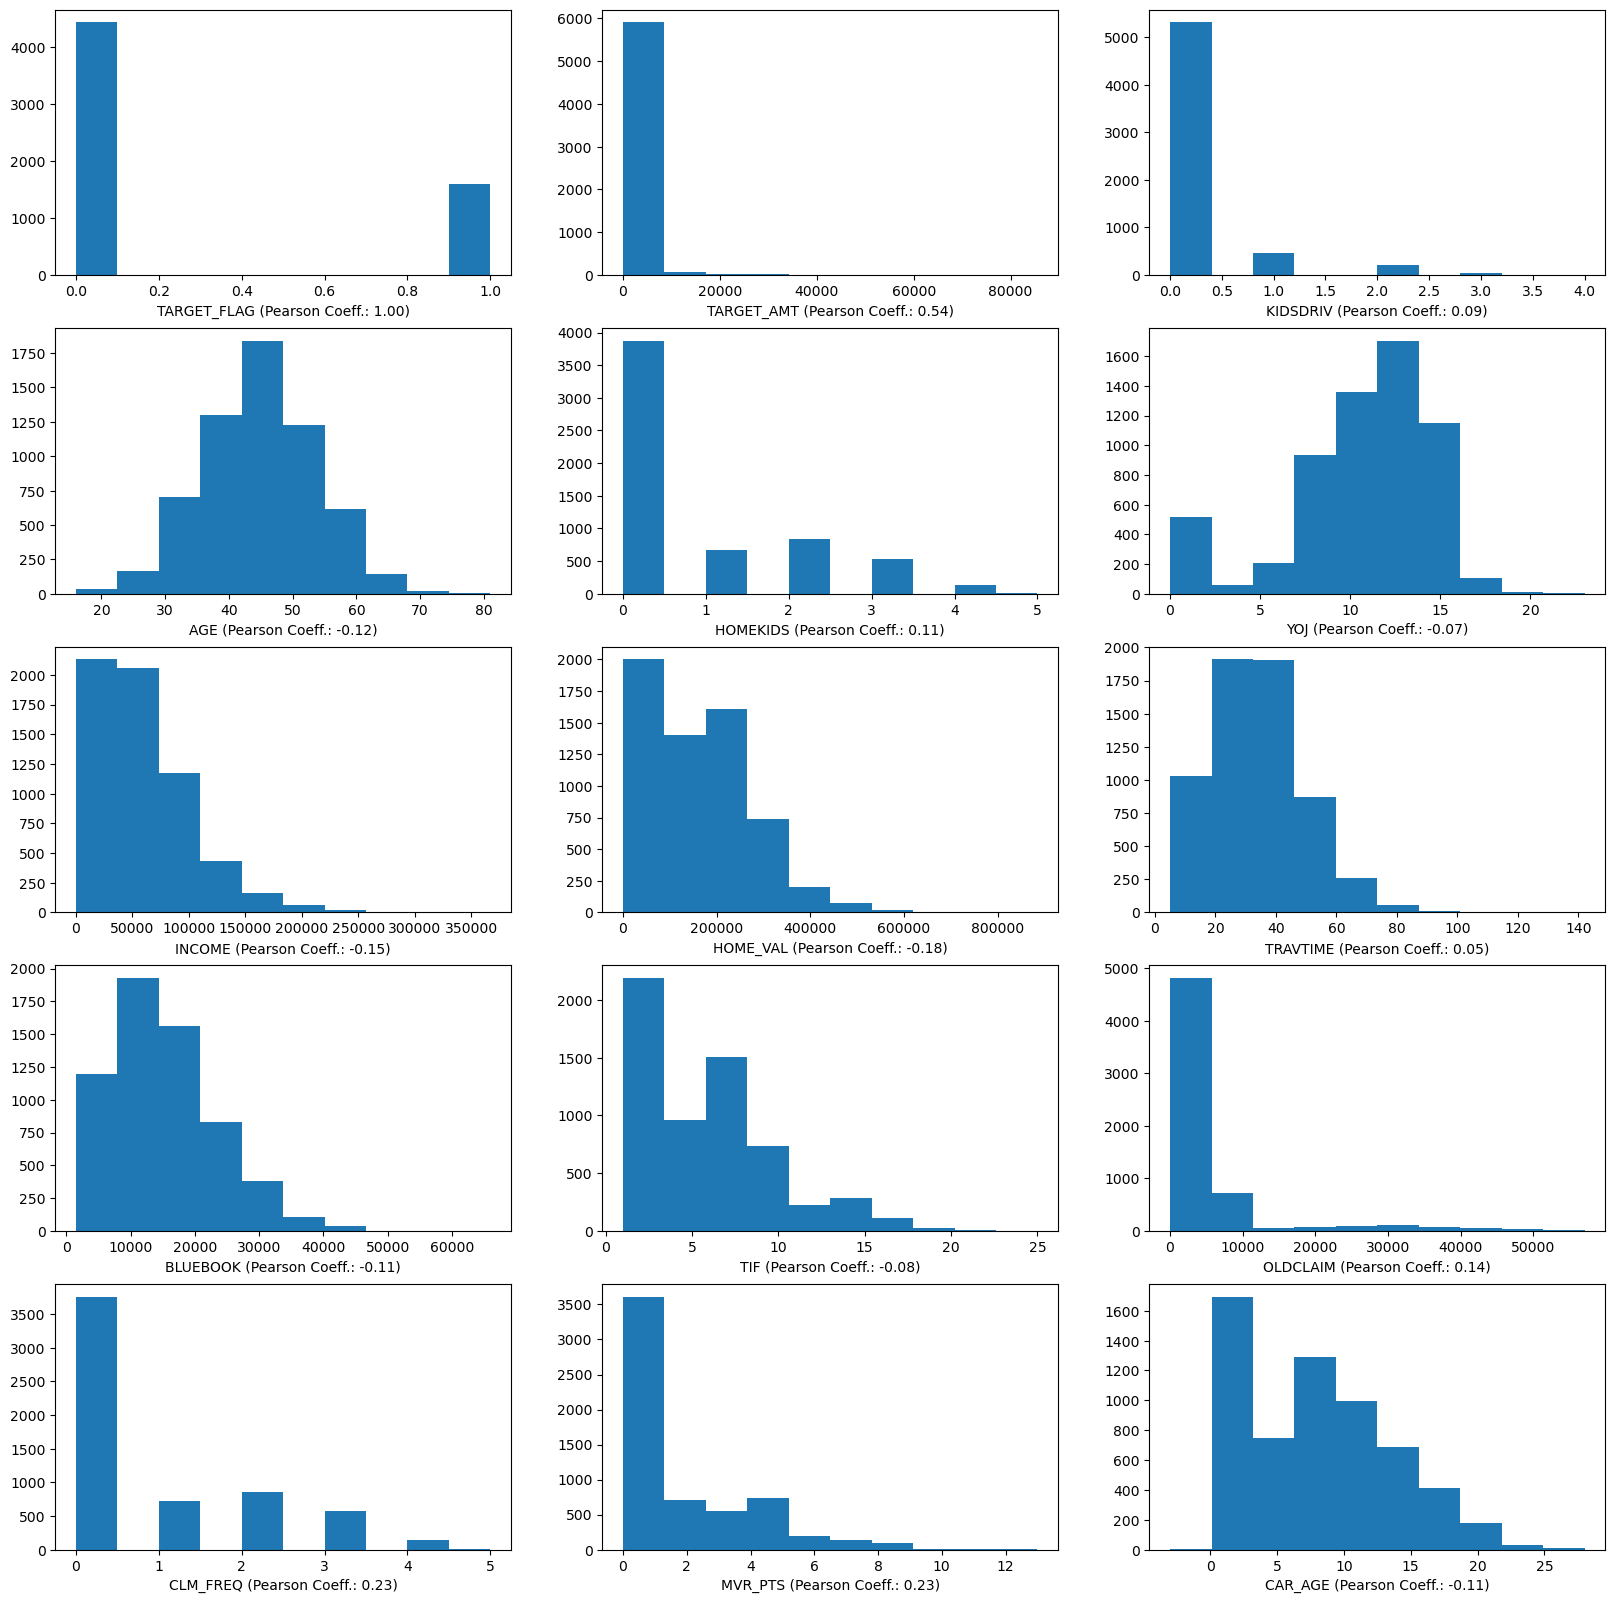

In [10]:

fig, axes = plt.subplots(5, 3, figsize=(20,20))

k=0
for i in range(5):
    for j in range(3):
        col = n[k]
        axes[i, j].hist(df[col])
        s = stats.pearsonr(df[col], df['TARGET_FLAG'])
        s =  f'{col} (Pearson Coeff.: {s[0]:.2f})'
        axes[i,j].set_xlabel(s)
        k+=1

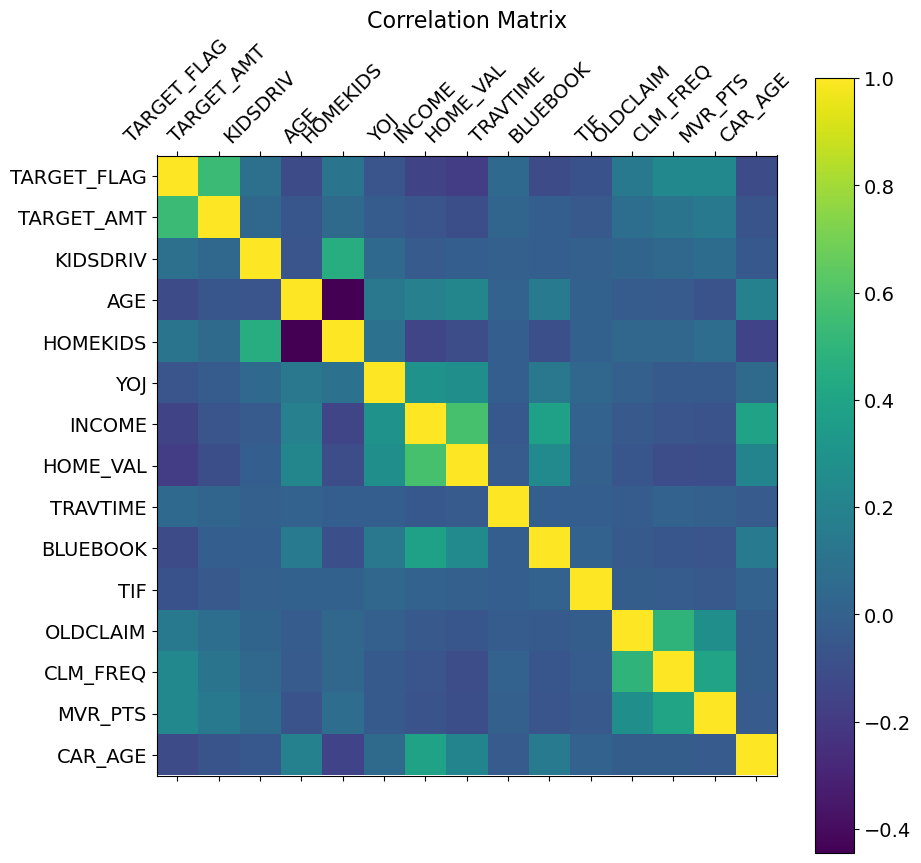

In [11]:

f = plt.figure(figsize=(10, 10))
plt.matshow(df[n].corr(), fignum=f.number)
plt.xticks(range(df[n].select_dtypes(['number']).shape[1]), df[n].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df[n].select_dtypes(['number']).shape[1]), df[n].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [1]:
import pandas as pd

In [11]:

def clean_currency(s):
    """Converts currency string '$1,234' to float 1234.0 """
    s = ''.join([x for x in s if x not in ['$',',']])
    s = float(s)
    return s


def clean_data(df):
    '''Removes NaN and converts string cash values to numeric'''
    for col in df:
        series = df[col]
        sample = series.iloc[0]

        if isinstance(sample, str) and sample[0] == '$':
            series = series.apply(lambda x : clean_currency(x) if pd.notnull(x) else x)
            df[col] = series

    df = df.dropna(axis=0)
    return df


def load_data(path): 
    df = pd.read_csv(path)
    df = df.drop(['INDEX', 'TARGET_AMT'], axis = 1)
    y = df['TARGET_FLAG']
    X = df.drop('TARGET_FLAG', axis = 1)
    df = clean_data(df)
    return X, y


In [6]:
pd.read_csv('auto-insurance-fall-2017/test_auto.csv')

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,10279,NaN,NaN,0,46.0,0,0.0,$0,No,$0,...,"$1,500",6,Sports Car,no,"$20,519",1,Yes,3,8.0,z_Highly Rural/ Rural
2137,10281,NaN,NaN,0,46.0,0,12.0,"$43,501",No,"$134,977",...,"$16,080",3,Minivan,no,$0,0,No,2,1.0,z_Highly Rural/ Rural
2138,10285,NaN,NaN,0,55.0,0,10.0,"$141,083",No,"$393,624",...,"$21,110",10,Sports Car,no,$0,0,No,0,22.0,z_Highly Rural/ Rural
2139,10294,NaN,NaN,0,51.0,0,10.0,"$128,523",No,$0,...,"$32,960",6,Panel Truck,no,"$3,995",3,No,1,15.0,Highly Urban/ Urban


In [14]:


def get_categorical_features(df):
    """Identify categorical features in feature dataset."""
    cat = [i  for i,(col, dt) in enumerate(df.dtypes.items()) if dt == object]
    return cat


def clean_currency(s):
    """Converts currency string '$1,234' to float 1234.0 """
    s = ''.join([x for x in s if x not in ['$',',']])
    s = float(s)
    return s


def clean_data(df):
    '''Removes NaN and converts string cash values to numeric'''
    for col in df:
        series = df[col]
        sample = series.iloc[0]
        if isinstance(sample, str) and sample[0] == '$':
            series = series.apply(lambda x : clean_currency(x) if pd.notnull(x) else x)
            df[col] = series

    to_str = lambda x : str(x)
    for i in get_categorical_features(df):
        col = df.loc[i]
        col = col.apply(to_str)
        col = df.fillna(value = 'nan')

    return df


def load_data(path, test = False): 
    df = pd.read_csv(path)
    if test:
        y = None
        X = df.drop(['INDEX', 'TARGET_AMT', 'TARGET_FLAG'], axis = 1)
        X = clean_data(X)
    else: 
        df = df.drop(['INDEX', 'TARGET_AMT'], axis = 1)
        df = clean_data(df)
        y = df['TARGET_FLAG']
        X = df.drop('TARGET_FLAG', axis = 1)

    return X, y




In [16]:

df, y = load_data('auto-insurance-fall-2017/train_auto.csv')


In [18]:
df.isna().sum()

KIDSDRIV        0
AGE             6
HOMEKIDS        0
YOJ           454
INCOME        445
PARENT1         0
HOME_VAL      464
MSTATUS         0
SEX             0
EDUCATION       0
JOB           526
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CAR_AGE       510
URBANICITY      0
dtype: int64